In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import svm
from sklearn.preprocessing import StandardScaler
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')



In [2]:
statlog_df = pd.read_csv("Data/statlog2.csv")
statlog_df2 = pd.read_csv("Data/statlog2.csv")

In [3]:
statlog_df.head(-5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,58,0,3,120,340,0,0,172,0,0.0,1,0,3,0
261,60,1,4,130,206,0,2,132,1,2.4,2,2,7,1
262,58,1,2,120,284,0,2,160,0,1.8,2,0,3,1
263,49,1,2,130,266,0,0,171,0,0.6,1,0,3,0


In [4]:
statlog_df2.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [5]:
statlog_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


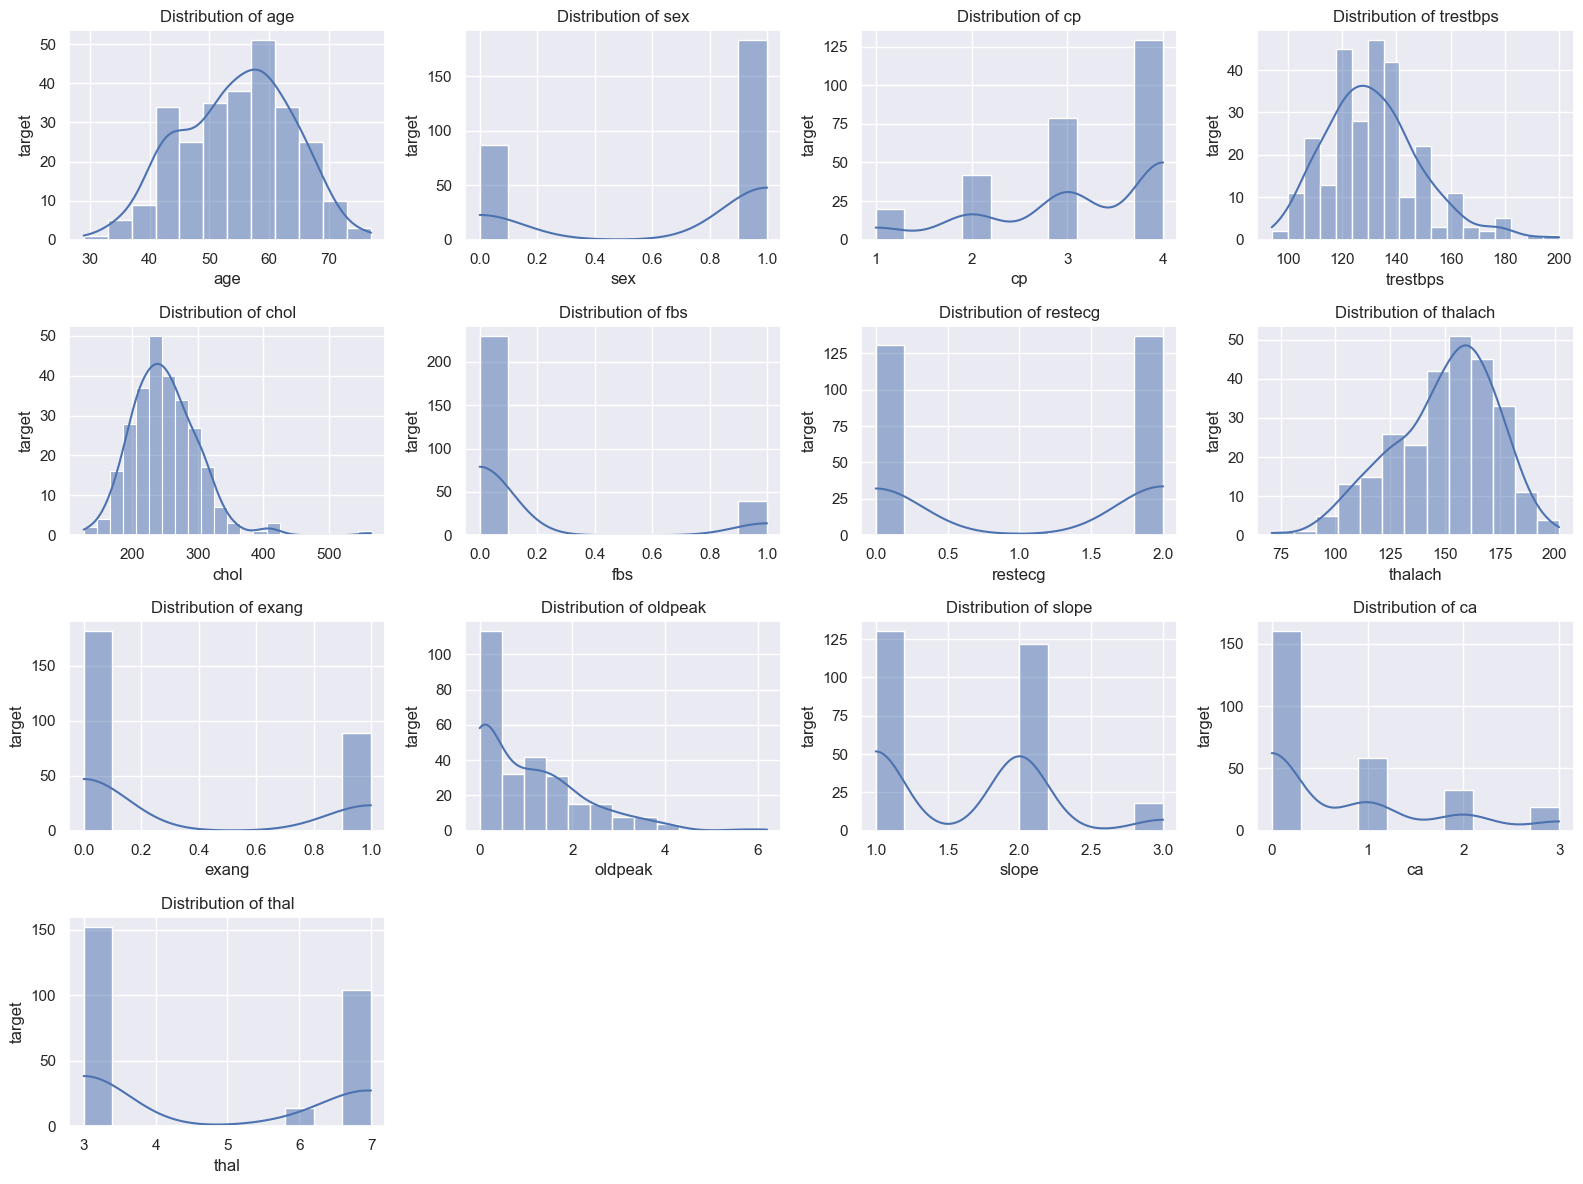

In [211]:
plt.figure(figsize=(16, 12))
for i, column in enumerate(statlog_df.columns[:-1]):  
    plt.subplot(4, 4, i+1)  
    sns.histplot(statlog_df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('target')

plt.tight_layout()
plt.show()

In [155]:
statlog_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [156]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(statlog_df.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [157]:
print(statlog_df.corr()["target"].abs().sort_values(ascending=False))

target      1.00
thal        0.53
ca          0.46
exang       0.42
thalach     0.42
oldpeak     0.42
cp          0.42
slope       0.34
sex         0.30
age         0.21
restecg     0.18
trestbps    0.16
chol        0.12
fbs         0.02
Name: target, dtype: float64


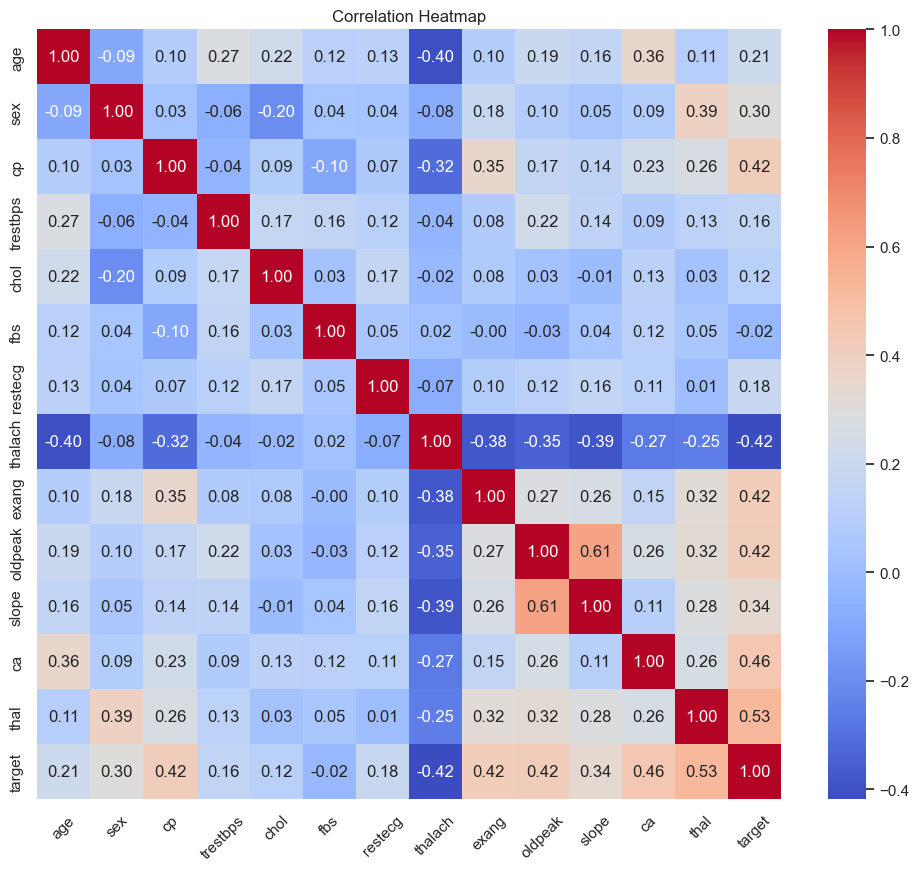

In [158]:
correlation_matrix = statlog_df2.corr()
plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Heatmap')
plt.xticks(rotation=45)

plt.show()


In [159]:
print("""
Sex : {}
Cp: {}
Fbs: {}
Restecg: {}
Exang : {}
Slope : {}
Ca : {}
Thal: {}
""".format(statlog_df.sex.unique(),
           statlog_df.cp.unique(),
           statlog_df.fbs.unique(),
           statlog_df.restecg.unique(),
           statlog_df.exang.unique(),
           statlog_df.slope.unique(),
           statlog_df.ca.unique(),
           statlog_df.thal.unique()))


Sex : [1 0]
Cp: [4 3 2 1]
Fbs: [0 1]
Restecg: [2 0 1]
Exang : [0 1]
Slope : [2 1 3]
Ca : [3 0 1 2]
Thal: [3 7 6]



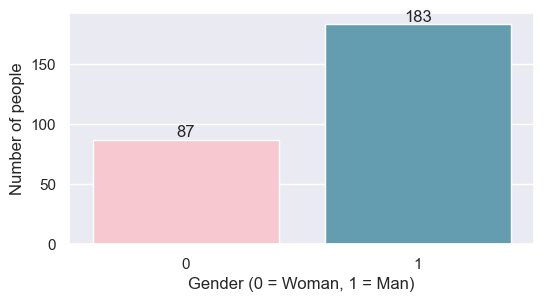

In [204]:
plt.figure(figsize=(6, 3))
sns.set()
ax = sns.countplot(x='sex', data=statlog_df, palette=["pink", "#58a3bc"])

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')

plt.xlabel("Gender (0 = Woman, 1 = Man)")
plt.ylabel("Number of people")
plt.show()


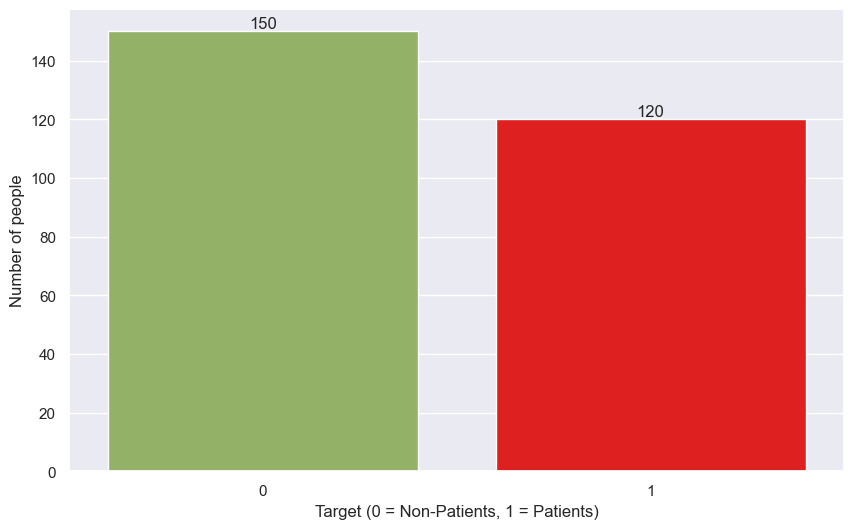

In [212]:
plt.figure(figsize=(10,6))
sns.set()

ax = sns.countplot(x="target", data=statlog_df, palette=["#97BE5A", "#FF0000"])

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, ha='center', va='bottom')

plt.ylabel("Number of people")
plt.xlabel("Target (0 = Non-Patients, 1 = Patients)")
plt.show()


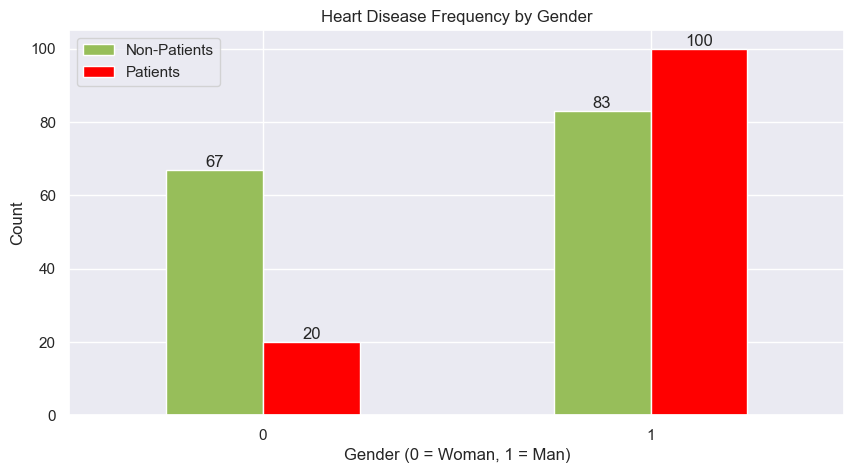

In [162]:
cross_tab = pd.crosstab(statlog_df.sex, statlog_df.target)
ax = cross_tab.plot(kind="bar", figsize=(10,5), color=["#97BE5A", "#FF0000"])

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.title('Heart Disease Frequency by Gender')
plt.xlabel('Gender (0 = Woman, 1 = Man)')
plt.ylabel('Number of people')
plt.xticks(rotation=0)
plt.legend(["Non-Patients", "Patients"])

plt.show()


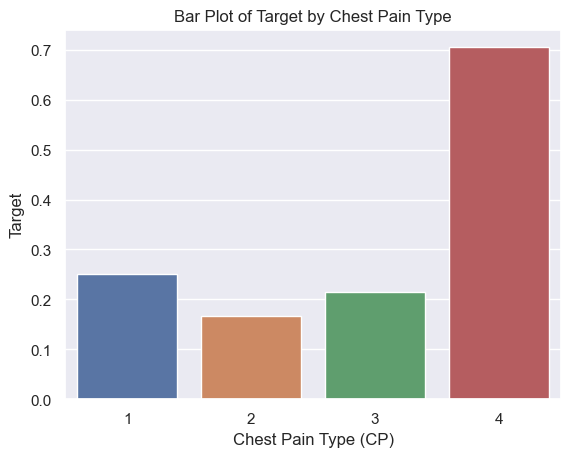

In [163]:
sns.barplot(x=statlog_df2["cp"], y=statlog_df["target"],ci=None)

plt.xlabel('Chest Pain Type (CP)')
plt.ylabel('Target')
plt.title('Bar Plot of Target by Chest Pain Type')


plt.show()


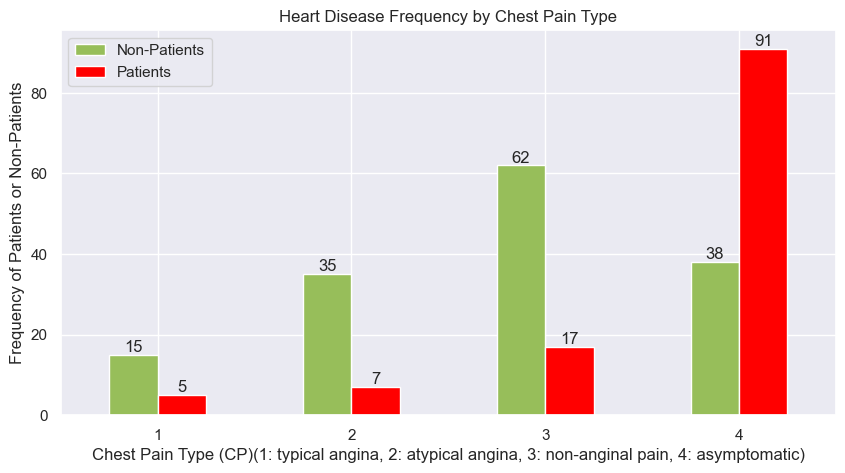

In [164]:
cross_tab = pd.crosstab(statlog_df2.cp, statlog_df.target)
ax = cross_tab.plot(kind="bar", figsize=(10,5), color=["#97BE5A", "#FF0000"])

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.title('Heart Disease Frequency by Chest Pain Type')
plt.xlabel('Chest Pain Type (CP)(1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic)')
plt.ylabel('Frequency of Patients or Non-Patients')
plt.xticks(rotation=0)
plt.legend(["Non-Patients", "Patients"])

plt.show()


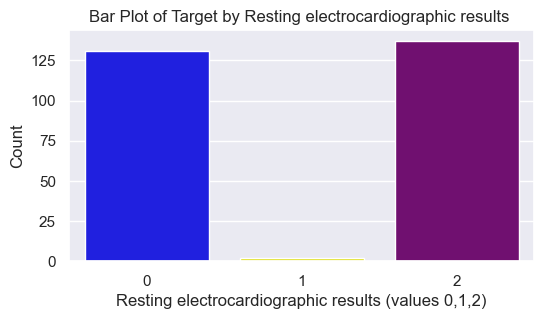

In [165]:
plt.figure(figsize=(6,3))
 
sns.set()
sns.countplot(x='restecg', data=statlog_df, palette=["blue","yellow","purple"])
plt.xlabel('Resting electrocardiographic results (values 0,1,2)')
plt.ylabel("Number of people")
plt.title('Bar Plot of Target by Resting electrocardiographic results ')
plt.show()

Text(0.5, 1.0, 'Bar Plot of Target by exercise induced angina')

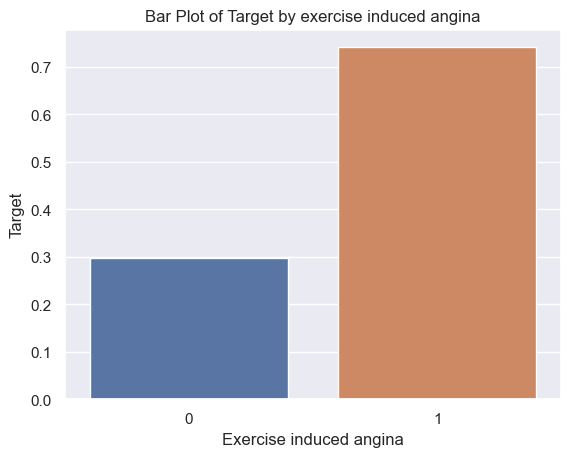

In [166]:

sns.barplot(x=statlog_df2["exang"], y=statlog_df["target"],ci=None)

plt.xlabel('Exercise induced angina')
plt.ylabel('Target')
plt.title('Bar Plot of Target by exercise induced angina')




Text(0.5, 1.0, 'Bar Plot of Target by the slope of the peak exercise ST segment')

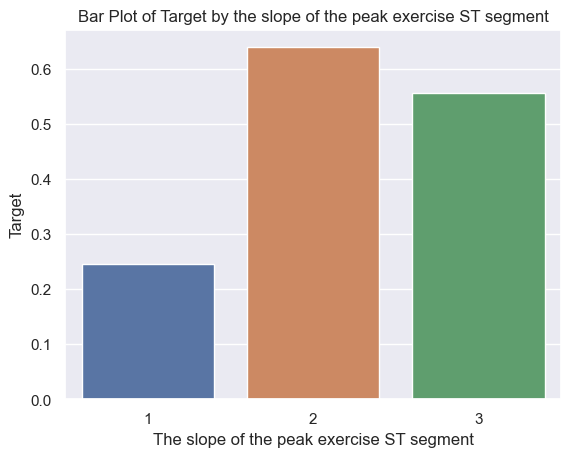

In [167]:
sns.barplot(x=statlog_df2["slope"], y=statlog_df["target"],ci=None)

plt.xlabel('The slope of the peak exercise ST segment')
plt.ylabel('Target')
plt.title('Bar Plot of Target by the slope of the peak exercise ST segment')



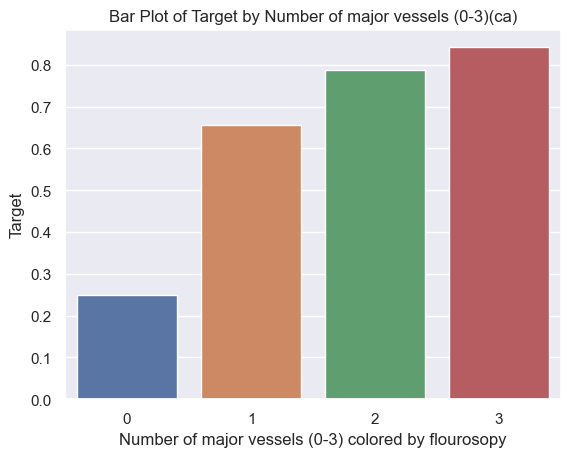

In [168]:
sns.barplot(x=statlog_df2["ca"], y=statlog_df["target"],ci=None)

plt.xlabel('Number of major vessels (0-3) colored by flourosopy')
plt.ylabel('Target')
plt.title('Bar Plot of Target by Number of major vessels (0-3)(ca)')


plt.show()


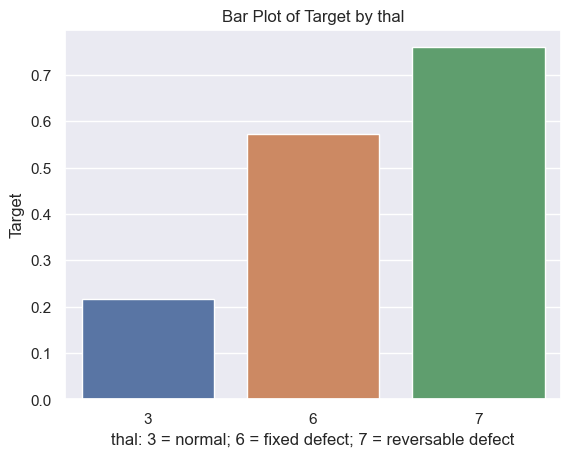

In [169]:
sns.barplot(x=statlog_df2["thal"], y=statlog_df["target"],ci=None)

plt.xlabel('thal: 3 = normal; 6 = fixed defect; 7 = reversable defect')
plt.ylabel('Target')
plt.title('Bar Plot of Target by thal')


plt.show()

In [170]:
statlog_df.cp = pd.Categorical(statlog_df.cp)
statlog_df.restecg = pd.Categorical(statlog_df.restecg)
statlog_df.slope = pd.Categorical(statlog_df.slope)
statlog_df.ca = pd.Categorical(statlog_df.ca)
statlog_df.thal = pd.Categorical(statlog_df.thal)

In [171]:
statlog_df.dtypes

age            int64
sex            int64
cp          category
trestbps       int64
chol           int64
fbs            int64
restecg     category
thalach        int64
exang          int64
oldpeak      float64
slope       category
ca          category
thal        category
target         int64
dtype: object

In [172]:
statlog_df = pd.get_dummies(statlog_df,drop_first=True)

In [173]:
statlog_df.dtypes

age            int64
sex            int64
trestbps       int64
chol           int64
fbs            int64
thalach        int64
exang          int64
oldpeak      float64
target         int64
cp_2           uint8
cp_3           uint8
cp_4           uint8
restecg_1      uint8
restecg_2      uint8
slope_2        uint8
slope_3        uint8
ca_1           uint8
ca_2           uint8
ca_3           uint8
thal_6         uint8
thal_7         uint8
dtype: object

In [174]:
 statlog_df = statlog_df[['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
          'cp_2', 'cp_3', 'cp_4','restecg_1', 'restecg_2', 
          'slope_2', 'slope_3', 'ca_2', 'ca_3',  'thal_6',
          'thal_7','target']]

In [175]:
statlog_df.dtypes

age            int64
sex            int64
trestbps       int64
chol           int64
fbs            int64
thalach        int64
exang          int64
oldpeak      float64
cp_2           uint8
cp_3           uint8
cp_4           uint8
restecg_1      uint8
restecg_2      uint8
slope_2        uint8
slope_3        uint8
ca_2           uint8
ca_3           uint8
thal_6         uint8
thal_7         uint8
target         int64
dtype: object

In [176]:
statlog_df.head(5)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_2,cp_3,cp_4,restecg_1,restecg_2,slope_2,slope_3,ca_2,ca_3,thal_6,thal_7,target
0,70,1,130,322,0,109,0,2.4,0,0,1,0,1,1,0,0,1,0,0,1
1,67,0,115,564,0,160,0,1.6,0,1,0,0,1,1,0,0,0,0,1,0
2,57,1,124,261,0,141,0,0.3,1,0,0,0,0,0,0,0,0,0,1,1
3,64,1,128,263,0,105,1,0.2,0,0,1,0,0,1,0,0,0,0,1,0
4,74,0,120,269,0,121,1,0.2,1,0,0,0,1,0,0,0,0,0,0,0


In [177]:
statlog_df.describe()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_2,cp_3,cp_4,restecg_1,restecg_2,slope_2,slope_3,ca_2,ca_3,thal_6,thal_7,target
count,270.00,270.00,270.00,270.00,270.00,270.00,270.00,270.00,270.00,270.00,270.00,2.70e+02,270.00,270.00,270.00,270.00,270.00,270.00,270.00,270.00
mean,54.43,0.68,131.34,249.66,0.15,149.68,0.33,1.05,0.16,0.29,0.48,7.41e-03,0.51,0.45,0.07,0.12,0.07,0.05,0.39,0.44
std,9.11,0.47,17.86,51.69,0.36,23.17,0.47,1.15,0.36,0.46,0.50,8.59e-02,0.50,0.50,0.25,0.33,0.26,0.22,0.49,0.50
min,29.00,0.00,94.00,126.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00e+00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,48.00,0.00,120.00,213.00,0.00,133.00,0.00,0.00,0.00,0.00,0.00,0.00e+00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,55.00,1.00,130.00,245.00,0.00,153.50,0.00,0.80,0.00,0.00,0.00,0.00e+00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,61.00,1.00,140.00,280.00,0.00,166.00,1.00,1.60,0.00,1.00,1.00,0.00e+00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00
max,77.00,1.00,200.00,564.00,1.00,202.00,1.00,6.20,1.00,1.00,1.00,1.00e+00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


# Logistic Regression without Normalization and Standardization

In [178]:
X_train, X_test, y_train, y_test = train_test_split(
                                   statlog_df.drop('target', axis=1), statlog_df['target'],test_size = .2,random_state=19)
lr = LogisticRegression()

lr.fit(X_train,y_train)

Y_pred_lr = lr.predict(X_test)
score_lr = round(accuracy_score(Y_pred_lr,y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")


The accuracy score achieved using Logistic Regression is: 85.19 %


In [179]:

lr = LogisticRegression()
lr.fit(X_train, y_train)

Y_pred_lr = lr.predict(X_test)
score_lr= accuracy_score(y_test, Y_pred_lr) * 100  # Accuracy (%)

predicted_probs_lr = lr.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class

cm = confusion_matrix(y_test, Y_pred_lr)

# Calculate Sensitivity (True Positive Rate)
sensitivity_lr = cm[1, 1] / (cm[1, 1] + cm[1, 0]) * 100  # Sensitivity (%)

# Calculate Specificity (True Negative Rate)
specificity_lr = cm[0, 0] / (cm[0, 0] + cm[0, 1]) * 100  # Specificity (%)

# Calculate AUC (Area Under the ROC Curve)
auc_lr = roc_auc_score(y_test, predicted_probs_lr) * 100  # AUC (%)

print("Sensitivity: {:.2f}%".format(sensitivity_lr))
print("Specificity: {:.2f}%".format(specificity_lr))
print("Accuracy: {:.2f}%".format(score_lr))
print("AUC: {:.2f}%".format(auc_lr))


Sensitivity: 80.00%
Specificity: 89.66%
Accuracy: 85.19%
AUC: 91.72%


## Logistic Regression with Normalization

In [180]:
X = statlog_df.drop('target',axis=1) # X
y = statlog_df.target # y

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X_normalized = pd.DataFrame(np_scaled)
X_normalized.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.85,1.0,0.34,0.45,0.0,0.29,0.0,0.39,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.79,0.0,0.20,1.00,0.0,0.68,0.0,0.26,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.58,1.0,0.28,0.31,0.0,0.53,0.0,0.05,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.73,1.0,0.32,0.31,0.0,0.26,1.0,0.03,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.94,0.0,0.25,0.33,0.0,0.38,1.0,0.03,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [181]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized,y,test_size = .2,random_state=19)
lr = LogisticRegression()
lr.fit(X_train,y_train)

lr_score = lr.score(X_test,y_test)*100
predicted_probs_lr = lr.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class

cm = confusion_matrix(y_test, Y_pred_lr)

# Calculate Sensitivity (True Positive Rate)
sensitivity_lr_nrm = cm[1, 1] / (cm[1, 1] + cm[1, 0]) * 100  # Sensitivity (%)

# Calculate Specificity (True Negative Rate)
specificity_lr_nrm = cm[0, 0] / (cm[0, 0] + cm[0, 1]) * 100  # Specificity (%)

# Calculate AUC (Area Under the ROC Curve)
auc_lr_nrm = roc_auc_score(y_test, predicted_probs_lr) * 100  # AUC (%)

print("Sensitivity: {:.2f}%".format(sensitivity_lr_nrm))
print("Specificity: {:.2f}%".format(specificity_lr_nrm))
print("Accuracy: {:.2f}%".format(lr_score))
print("AUC: {:.2f}%".format(auc_lr_nrm))


Sensitivity: 80.00%
Specificity: 89.66%
Accuracy: 85.19%
AUC: 92.69%


## Logistic Regression with Standardization

In [182]:
scaler = StandardScaler()


X_standardized = scaler.fit_transform(X)


X_standardized_df = pd.DataFrame(X_standardized, columns=X.columns)


print(X_standardized_df.head())

    age   sex  trestbps  chol   fbs  thalach  exang  oldpeak  cp_2  cp_3  \
0  1.71  0.69     -0.08  1.40 -0.42    -1.76  -0.70     1.18 -0.43 -0.64   
1  1.38 -1.45     -0.92  6.09 -0.42     0.45  -0.70     0.48 -0.43  1.55   
2  0.28  0.69     -0.41  0.22 -0.42    -0.38  -0.70    -0.66  2.33 -0.64   
3  1.05  0.69     -0.19  0.26 -0.42    -1.93   1.43    -0.74 -0.43 -0.64   
4  2.15 -1.45     -0.64  0.37 -0.42    -1.24   1.43    -0.74  2.33 -0.64   

   cp_4  restecg_1  restecg_2  slope_2  slope_3  ca_2  ca_3  thal_6  thal_7  
0  1.05      -0.09       0.99     1.10    -0.27 -0.37  3.63   -0.23   -0.79  
1 -0.96      -0.09       0.99     1.10    -0.27 -0.37 -0.28   -0.23    1.26  
2 -0.96      -0.09      -1.01    -0.91    -0.27 -0.37 -0.28   -0.23    1.26  
3  1.05      -0.09      -1.01     1.10    -0.27 -0.37 -0.28   -0.23    1.26  
4 -0.96      -0.09       0.99    -0.91    -0.27 -0.37 -0.28   -0.23   -0.79  


In [183]:
X_train, X_test, y_train, y_test = train_test_split(X_standardized,y,test_size = .2,random_state=19)
lr = LogisticRegression()
lr.fit(X_train,y_train)

lr_score_std = lr.score(X_test,y_test)*100
predicted_probs_lr = lr.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class

cm = confusion_matrix(y_test, Y_pred_lr)

# Calculate Sensitivity (True Positive Rate)
sensitivity_lr_std  = cm[1, 1] / (cm[1, 1] + cm[1, 0]) * 100  # Sensitivity (%)

# Calculate Specificity (True Negative Rate)
specificity_lr_std  = cm[0, 0] / (cm[0, 0] + cm[0, 1]) * 100  # Specificity (%)

# Calculate AUC (Area Under the ROC Curve)
auc_lr_std = roc_auc_score(y_test, predicted_probs_lr) * 100  # AUC (%)

print("Sensitivity: {:.2f}%".format(sensitivity_lr_std))
print("Specificity: {:.2f}%".format(specificity_lr_std))
print("Accuracy: {:.2f}%".format(lr_score_std))
print("AUC: {:.2f}%".format(auc_lr_std))


Sensitivity: 80.00%
Specificity: 89.66%
Accuracy: 87.04%
AUC: 92.14%


## KNN without Normalization and Standardization

In [184]:
X_train, X_test, y_train, y_test = train_test_split(statlog_df.drop('target', axis=1),statlog_df['target'],test_size = .2
                                                    ,random_state=19)
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
Y_pred_knn=knn.predict(X_test)
score_knn = round(accuracy_score(Y_pred_knn,y_test)*100,2)


predicted_probs_knn = knn.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class

cm = confusion_matrix(y_test, Y_pred_knn)

# Calculate Sensitivity (True Positive Rate)
sensitivity_knn  = cm[1, 1] / (cm[1, 1] + cm[1, 0]) * 100  # Sensitivity (%)

# Calculate Specificity (True Negative Rate)
specificity_knn  = cm[0, 0] / (cm[0, 0] + cm[0, 1]) * 100  # Specificity (%)

# Calculate AUC (Area Under the ROC Curve)
auc_knn = roc_auc_score(y_test, predicted_probs_knn) * 100  # AUC (%)

print("Sensitivity: {:.2f}%".format(sensitivity_knn))
print("Specificity: {:.2f}%".format(specificity_knn))
print("Accuracy: {:.2f}%".format(score_knn))
print("AUC: {:.2f}%".format(auc_knn))


Sensitivity: 48.00%
Specificity: 79.31%
Accuracy: 64.81%
AUC: 69.66%


## KNN with Standardization

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y,test_size = .2, random_state=19)

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
Y_pred_knn=knn.predict(X_test)
score_knn_std = round(accuracy_score(Y_pred_knn,y_test)*100,2)


predicted_probs_knn = knn.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class

cm = confusion_matrix(y_test, Y_pred_knn)

# Calculate Sensitivity (True Positive Rate)
sensitivity_knn_std  = cm[1, 1] / (cm[1, 1] + cm[1, 0]) * 100  # Sensitivity (%)

# Calculate Specificity (True Negative Rate)
specificity_knn_std  = cm[0, 0] / (cm[0, 0] + cm[0, 1]) * 100  # Specificity (%)

# Calculate AUC (Area Under the ROC Curve)
auc_knn_std = roc_auc_score(y_test, predicted_probs_knn) * 100  # AUC (%)

print("Sensitivity: {:.2f}%".format(sensitivity_knn_std))
print("Specificity: {:.2f}%".format(specificity_knn_std))
print("Accuracy: {:.2f}%".format(score_knn_std))
print("AUC: {:.2f}%".format(auc_knn_std))


Sensitivity: 56.00%
Specificity: 96.55%
Accuracy: 77.78%
AUC: 82.21%


## KNN with Normalization

In [186]:
X_train, X_test, y_train, y_test = train_test_split(
                                   X_normalized, 
                                   y, 
                                   test_size = .2, 
                                   random_state=19)

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
Y_pred_knn=knn.predict(X_test)
score_knn_nrm = round(accuracy_score(Y_pred_knn,y_test)*100,2)

predicted_probs_knn = knn.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class

cm = confusion_matrix(y_test, Y_pred_knn)

# Calculate Sensitivity (True Positive Rate)
sensitivity_knn_nrm  = cm[1, 1] / (cm[1, 1] + cm[1, 0]) * 100  # Sensitivity (%)

# Calculate Specificity (True Negative Rate)
specificity_knn_nrm  = cm[0, 0] / (cm[0, 0] + cm[0, 1]) * 100  # Specificity (%)

# Calculate AUC (Area Under the ROC Curve)
auc_knn_nrm = roc_auc_score(y_test, predicted_probs_knn) * 100  # AUC (%)

print("Sensitivity: {:.2f}%".format(sensitivity_knn_nrm))
print("Specificity: {:.2f}%".format(specificity_knn_nrm))
print("Accuracy: {:.2f}%".format(score_knn_nrm))
print("AUC: {:.2f}%".format(auc_knn_nrm))


Sensitivity: 56.00%
Specificity: 96.55%
Accuracy: 77.78%
AUC: 79.52%


## Max KNN Score without Normalization and Standardization

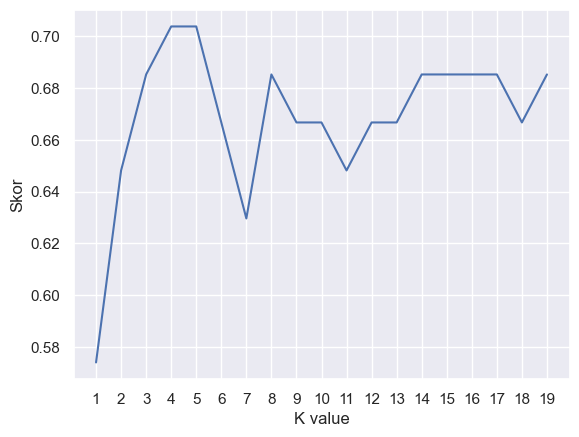

Sensitivity: 56.00%
Specificity: 96.55%
Accuracy: 70.37%
AUC: 60.48%


In [187]:
X_train, X_test, y_train, y_test = train_test_split(
                                   statlog_df.drop('target', axis=1),
                                   statlog_df['target'], 
                                   test_size = .2, 
                                   random_state=19)


scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i) 
    knn2.fit(X_train, y_train)
    scoreList.append(knn2.score(X_test, y_test))

sns.set()    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Scor")
plt.show()

knn_score_mx = max(scoreList)*100

predicted_probs_knn = knn.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class

cm = confusion_matrix(y_test, Y_pred_knn)

# Calculate Sensitivity (True Positive Rate)
sensitivity_knn_mx  = cm[1, 1] / (cm[1, 1] + cm[1, 0]) * 100  # Sensitivity (%)

# Calculate Specificity (True Negative Rate)
specificity_knn_mx  = cm[0, 0] / (cm[0, 0] + cm[0, 1]) * 100  # Specificity (%)

# Calculate AUC (Area Under the ROC Curve)
auc_knn_mx= roc_auc_score(y_test, predicted_probs_knn) * 100  # AUC (%)

print("Sensitivity: {:.2f}%".format(sensitivity_knn_mx))
print("Specificity: {:.2f}%".format(specificity_knn_mx))
print("Accuracy: {:.2f}%".format(knn_score_mx))
print("AUC: {:.2f}%".format(auc_knn_mx))


## Max KNN Score with Standardization

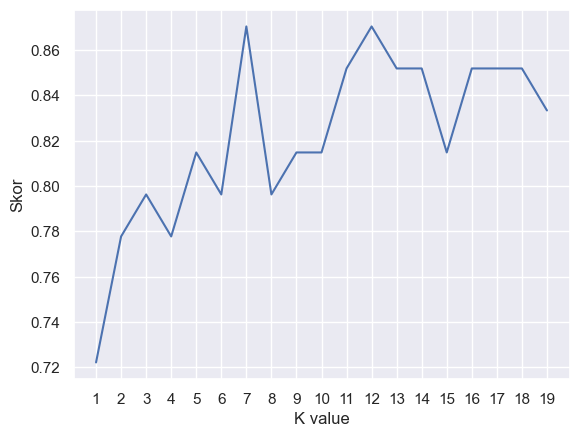

Sensitivity: 56.00%
Specificity: 96.55%
Accuracy: 87.04%
AUC: 87.45%


In [188]:
X_train, X_test, y_train, y_test = train_test_split(
                                   X_standardized,
                                   y, 
                                   test_size = .2,
                                   random_state=19)

scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  
    knn2.fit(X_train, y_train)
    scoreList.append(knn2.score(X_test, y_test))

sns.set()    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Scor")
plt.show()

knn_score_mx_std = max(scoreList)*100

predicted_probs_knn = knn.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class

cm = confusion_matrix(y_test, Y_pred_knn)

# Calculate Sensitivity (True Positive Rate)
sensitivity_knn_mx_std  = cm[1, 1] / (cm[1, 1] + cm[1, 0]) * 100  # Sensitivity (%)

# Calculate Specificity (True Negative Rate)
specificity_knn_mx_std  = cm[0, 0] / (cm[0, 0] + cm[0, 1]) * 100  # Specificity (%)

# Calculate AUC (Area Under the ROC Curve)
auc_knn_mx_std= roc_auc_score(y_test, predicted_probs_knn) * 100  # AUC (%)

print("Sensitivity: {:.2f}%".format(sensitivity_knn_mx_std))
print("Specificity: {:.2f}%".format(specificity_knn_mx_std))
print("Accuracy: {:.2f}%".format(knn_score_mx_std))
print("AUC: {:.2f}%".format(auc_knn_mx_std))


## Max KNN with Normalization

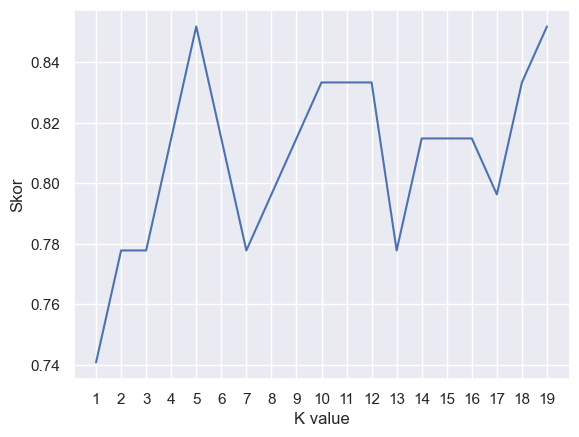

Sensitivity: 56.00%
Specificity: 96.55%
Accuracy: 85.19%
AUC: 79.52%


In [189]:
X_train, X_test, y_train, y_test = train_test_split(
                                   X_normalized, 
                                   y, 
                                   test_size = .2, 
                                   random_state=19)
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(X_train, y_train)
    scoreList.append(knn2.score(X_test, y_test))

sns.set()    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Scor")
plt.show()

knn_score_mx_nrm = max(scoreList)*100

predicted_probs_knn = knn.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class

cm = confusion_matrix(y_test, Y_pred_knn)

# Calculate Sensitivity (True Positive Rate)
sensitivity_knn_mx_nrm  = cm[1, 1] / (cm[1, 1] + cm[1, 0]) * 100  # Sensitivity (%)

# Calculate Specificity (True Negative Rate)
specificity_knn_mx_nrm  = cm[0, 0] / (cm[0, 0] + cm[0, 1]) * 100  # Specificity (%)

# Calculate AUC (Area Under the ROC Curve)
auc_knn_mx_nrm= roc_auc_score(y_test, predicted_probs_knn) * 100  # AUC (%)

print("Sensitivity: {:.2f}%".format(sensitivity_knn_mx_nrm))
print("Specificity: {:.2f}%".format(specificity_knn_mx_nrm))
print("Accuracy: {:.2f}%".format(knn_score_mx_nrm))
print("AUC: {:.2f}%".format(auc_knn_mx_nrm))


## Random Forest without Normalization and Standardization

In [190]:
X_train, X_test, y_train, y_test = train_test_split(
                                   statlog_df.drop('target', axis=1),statlog_df['target'],test_size = .2,random_state=19)
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(X_train, y_train)
Y_pred_rf = rf.predict(X_test)
rf_score = rf.score(X_test, y_test)*100

predicted_probs_rf = rf.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class

cm = confusion_matrix(y_test, Y_pred_rf)

# Calculate Sensitivity (True Positive Rate)
sensitivity_rf  = cm[1, 1] / (cm[1, 1] + cm[1, 0]) * 100  # Sensitivity (%)

# Calculate Specificity (True Negative Rate)
specificity_rf  = cm[0, 0] / (cm[0, 0] + cm[0, 1]) * 100  # Specificity (%)

# Calculate AUC (Area Under the ROC Curve)
auc_rf= roc_auc_score(y_test, predicted_probs_rf) * 100  # AUC (%)

print("Sensitivity: {:.2f}%".format(sensitivity_rf))
print("Specificity: {:.2f}%".format(specificity_rf))
print("Accuracy: {:.2f}%".format(rf_score))
print("AUC: {:.2f}%".format(auc_rf))

Sensitivity: 72.00%
Specificity: 86.21%
Accuracy: 79.63%
AUC: 91.17%


## Random Forest with Normalization

In [191]:
X_train, X_test, y_train, y_test = train_test_split(
                                   X_normalized,y, 
                                   test_size = .2, 
                                   random_state=19)

rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(X_train, y_train)
Y_pred_rf = rf.predict(X_test)
rf_score_nrm = rf.score(X_test, y_test)*100

predicted_probs_rf = rf.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class

cm = confusion_matrix(y_test, Y_pred_rf)

# Calculate Sensitivity (True Positive Rate)
sensitivity_rf_nrm  = cm[1, 1] / (cm[1, 1] + cm[1, 0]) * 100  # Sensitivity (%)

# Calculate Specificity (True Negative Rate)
specificity_rf_nrm  = cm[0, 0] / (cm[0, 0] + cm[0, 1]) * 100  # Specificity (%)

# Calculate AUC (Area Under the ROC Curve)
auc_rf_nrm= roc_auc_score(y_test, predicted_probs_rf) * 100  # AUC (%)

print("Sensitivity: {:.2f}%".format(sensitivity_rf_nrm))
print("Specificity: {:.2f}%".format(specificity_rf_nrm))
print("Accuracy: {:.2f}%".format(rf_score_nrm))
print("AUC: {:.2f}%".format(auc_rf_nrm))


Sensitivity: 72.00%
Specificity: 86.21%
Accuracy: 79.63%
AUC: 91.17%


## Random Forest with  Standardization

In [192]:
X_train, X_test, y_train, y_test = train_test_split(
                                   X_standardized,y,test_size = .2,random_state=19)


rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(X_train, y_train)
Y_pred_rf = rf.predict(X_test)
rf_score_std = rf.score(X_test, y_test)*100

predicted_probs_rf = rf.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class

cm = confusion_matrix(y_test, Y_pred_rf)

# Calculate Sensitivity (True Positive Rate)
sensitivity_rf_std = cm[1, 1] / (cm[1, 1] + cm[1, 0]) * 100  # Sensitivity (%)

# Calculate Specificity (True Negative Rate)
specificity_rf_std  = cm[0, 0] / (cm[0, 0] + cm[0, 1]) * 100  # Specificity (%)

# Calculate AUC (Area Under the ROC Curve)
auc_rf_std= roc_auc_score(y_test, predicted_probs_rf) * 100  # AUC (%)

print("Sensitivity: {:.2f}%".format(sensitivity_rf_std))
print("Specificity: {:.2f}%".format(specificity_rf_std))
print("Accuracy: {:.2f}%".format(rf_score_std))
print("AUC: {:.2f}%".format(auc_rf_std))


Sensitivity: 72.00%
Specificity: 86.21%
Accuracy: 79.63%
AUC: 91.17%


## Naive Bayes without Normalization and Standardization

In [193]:
X_train, X_test, y_train, y_test = train_test_split(
                                   statlog_df.drop('target', axis=1),statlog_df['target'],test_size = .2,random_state=19)

nb = GaussianNB()

nb.fit(X_train,y_train)

Y_pred_nb = nb.predict(X_test)
score_nb = round(accuracy_score(Y_pred_nb,y_test)*100,2)

predicted_probs_nb = nb.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class

cm = confusion_matrix(y_test, Y_pred_nb)

# Calculate Sensitivity (True Positive Rate)
sensitivity_nb = cm[1, 1] / (cm[1, 1] + cm[1, 0]) * 100  # Sensitivity (%)

# Calculate Specificity (True Negative Rate)
specificity_nb = cm[0, 0] / (cm[0, 0] + cm[0, 1]) * 100  # Specificity (%)

# Calculate AUC (Area Under the ROC Curve)
auc_nb= roc_auc_score(y_test, predicted_probs_nb) * 100  # AUC (%)

print("Sensitivity: {:.2f}%".format(sensitivity_nb))
print("Specificity: {:.2f}%".format(specificity_nb))
print("Accuracy: {:.2f}%".format(score_nb))
print("AUC: {:.2f}%".format(auc_nb))


Sensitivity: 80.00%
Specificity: 89.66%
Accuracy: 85.19%
AUC: 87.45%


## Naive Bayes with Normalization

In [194]:
X_train, X_test, y_train, y_test = train_test_split(
                                   X_normalized,y, test_size = .2, random_state=19)


nb = GaussianNB()

nb.fit(X_train,y_train)

Y_pred_nb = nb.predict(X_test)
score_nb_nrm = round(accuracy_score(Y_pred_nb,y_test)*100,2)

predicted_probs_nb = nb.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class

cm = confusion_matrix(y_test, Y_pred_nb)

# Calculate Sensitivity (True Positive Rate)
sensitivity_nb_nrm = cm[1, 1] / (cm[1, 1] + cm[1, 0]) * 100  # Sensitivity (%)

# Calculate Specificity (True Negative Rate)
specificity_nb_nrm = cm[0, 0] / (cm[0, 0] + cm[0, 1]) * 100  # Specificity (%)

# Calculate AUC (Area Under the ROC Curve)
auc_nb_nrm= roc_auc_score(y_test, predicted_probs_nb) * 100  # AUC (%)

print("Sensitivity: {:.2f}%".format(sensitivity_nb_nrm))
print("Specificity: {:.2f}%".format(specificity_nb_nrm))
print("Accuracy: {:.2f}%".format(score_nb_nrm))
print("AUC: {:.2f}%".format(auc_nb_nrm))


Sensitivity: 80.00%
Specificity: 89.66%
Accuracy: 85.19%
AUC: 87.45%


## Naive Bayes with Standardization

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X_standardized,y,test_size = .2, random_state=19)
nb = GaussianNB()

nb.fit(X_train,y_train)

Y_pred_nb = nb.predict(X_test)
score_nb_std = round(accuracy_score(Y_pred_nb,y_test)*100,2)
predicted_probs_nb = nb.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class

cm = confusion_matrix(y_test, Y_pred_nb)

# Calculate Sensitivity (True Positive Rate)
sensitivity_nb_std = cm[1, 1] / (cm[1, 1] + cm[1, 0]) * 100  # Sensitivity (%)

# Calculate Specificity (True Negative Rate)
specificity_nb_std = cm[0, 0] / (cm[0, 0] + cm[0, 1]) * 100  # Specificity (%)

# Calculate AUC (Area Under the ROC Curve)
auc_nb_std= roc_auc_score(y_test, predicted_probs_nb) * 100  # AUC (%)

print("Sensitivity: {:.2f}%".format(sensitivity_nb_std))
print("Specificity: {:.2f}%".format(specificity_nb_std))
print("Accuracy: {:.2f}%".format(score_nb_std))
print("AUC: {:.2f}%".format(auc_nb_std))


Sensitivity: 80.00%
Specificity: 89.66%
Accuracy: 85.19%
AUC: 87.45%


## Decision Tree without Normalization and Standardization

In [196]:
X_train, X_test, y_train, y_test = train_test_split(statlog_df.drop('target', axis=1),statlog_df['target'], test_size = .2
                                                    ,random_state=19)


dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
Y_pred_dtc = dtc.predict(X_test)

dtc_score = dtc.score(X_test, y_test)*100

predicted_probs_dtc = dtc.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class

cm = confusion_matrix(y_test, Y_pred_dtc)

# Calculate Sensitivity (True Positive Rate)
sensitivity_dtc = cm[1, 1] / (cm[1, 1] + cm[1, 0]) * 100  # Sensitivity (%)

# Calculate Specificity (True Negative Rate)
specificity_dtc = cm[0, 0] / (cm[0, 0] + cm[0, 1]) * 100  # Specificity (%)

# Calculate AUC (Area Under the ROC Curve)
auc_dtc= roc_auc_score(y_test, predicted_probs_dtc) * 100  # AUC (%)

print("Sensitivity: {:.2f}%".format(sensitivity_dtc))
print("Specificity: {:.2f}%".format(specificity_dtc))
print("Accuracy: {:.2f}%".format(dtc_score))
print("AUC: {:.2f}%".format(auc_dtc))


Sensitivity: 60.00%
Specificity: 62.07%
Accuracy: 61.11%
AUC: 61.03%


## Decision Tree with Normalization

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized,y,test_size = .2,random_state=19)

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
Y_pred_dtc = dtc.predict(X_test)

dtc_score_nrm = dtc.score(X_test, y_test)*100

predicted_probs_dtc = dtc.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class

cm = confusion_matrix(y_test, Y_pred_dtc)

# Calculate Sensitivity (True Positive Rate)
sensitivity_dtc_nrm = cm[1, 1] / (cm[1, 1] + cm[1, 0]) * 100  # Sensitivity (%)

# Calculate Specificity (True Negative Rate)
specificity_dtc_nrm = cm[0, 0] / (cm[0, 0] + cm[0, 1]) * 100  # Specificity (%)

# Calculate AUC (Area Under the ROC Curve)
auc_dtc_nrm= roc_auc_score(y_test, predicted_probs_dtc) * 100  # AUC (%)

print("Sensitivity: {:.2f}%".format(sensitivity_dtc_nrm))
print("Specificity: {:.2f}%".format(specificity_dtc_nrm))
print("Accuracy: {:.2f}%".format(dtc_score_nrm))
print("AUC: {:.2f}%".format(auc_dtc_nrm))
print("Decision Tree Test Accuracy {:.2f}%".format(dtc_score_nrm*100))

Sensitivity: 64.00%
Specificity: 55.17%
Accuracy: 59.26%
AUC: 59.59%
Decision Tree Test Accuracy 5925.93%


## Decision Tree with Standardization

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X_standardized,y, test_size = .2, random_state=19)
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
Y_pred_dtc = dtc.predict(X_test)

dtc_score_std = dtc.score(X_test, y_test)*100

predicted_probs_dtc = dtc.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class

cm = confusion_matrix(y_test, Y_pred_dtc)

# Calculate Sensitivity (True Positive Rate)
sensitivity_dtc_std = cm[1, 1] / (cm[1, 1] + cm[1, 0]) * 100  # Sensitivity (%)

# Calculate Specificity (True Negative Rate)
specificity_dtc_std = cm[0, 0] / (cm[0, 0] + cm[0, 1]) * 100  # Specificity (%)

# Calculate AUC (Area Under the ROC Curve)
auc_dtc_std= roc_auc_score(y_test, predicted_probs_dtc) * 100  # AUC (%)

print("Sensitivity: {:.2f}%".format(sensitivity_dtc_std))
print("Specificity: {:.2f}%".format(specificity_dtc_std))
print("Accuracy: {:.2f}%".format(dtc_score_std))
print("AUC: {:.2f}%".format(auc_dtc_std))


Sensitivity: 64.00%
Specificity: 58.62%
Accuracy: 61.11%
AUC: 61.31%


## Support Vector Machine without Normalization and Standardization

In [199]:
X_train, X_test, y_train, y_test = train_test_split(statlog_df.drop('target', axis=1), statlog_df['target'], test_size=0.2, random_state=19)

svm = SVC(kernel='linear', probability=True)  
svm.fit(X_train, y_train)

Y_pred_svm = svm.predict(X_test)
score_svm = round(accuracy_score(y_test, Y_pred_svm) * 100, 2)

# Calculating confusion matrix
cm = confusion_matrix(y_test, Y_pred_svm)

# Calculate Sensitivity (True Positive Rate)
sensitivity_svm = cm[1, 1] / (cm[1, 1] + cm[1, 0]) * 100  # Sensitivity (%)

# Calculate Specificity (True Negative Rate)
specificity_svm = cm[0, 0] / (cm[0, 0] + cm[0, 1]) * 100  # Specificity (%)

# Calculate AUC (Area Under the ROC Curve)
predicted_probs_svm = svm.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class
auc_svm = roc_auc_score(y_test, predicted_probs_svm) * 100  # AUC (%)

# Printing the results
print("Sensitivity: {:.2f}%".format(sensitivity_svm))
print("Specificity: {:.2f}%".format(specificity_svm))
print("Accuracy: {:.2f}%".format(score_svm))
print("AUC: {:.2f}%".format(auc_svm))



Sensitivity: 80.00%
Specificity: 93.10%
Accuracy: 87.04%
AUC: 91.45%


## Support Vector Machine with Normalization

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y,test_size = .2,random_state=19)
svm = SVC(kernel='linear', probability=True)  
svm.fit(X_train, y_train)

Y_pred_svm = svm.predict(X_test)
score_svm_nrm = round(accuracy_score(Y_pred_svm,y_test)*100,2)

# Calculating confusion matrix
cm = confusion_matrix(y_test, Y_pred_svm)

# Calculate Sensitivity (True Positive Rate)
sensitivity_svm_nrm = cm[1, 1] / (cm[1, 1] + cm[1, 0]) * 100  # Sensitivity (%)

# Calculate Specificity (True Negative Rate)
specificity_svm_nrm = cm[0, 0] / (cm[0, 0] + cm[0, 1]) * 100  # Specificity (%)

# Calculate AUC (Area Under the ROC Curve)
predicted_probs_svm = svm.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class
auc_svm_nrm = roc_auc_score(y_test, predicted_probs_svm) * 100  # AUC (%)

# Printing the results
print("Sensitivity: {:.2f}%".format(sensitivity_svm_nrm))
print("Specificity: {:.2f}%".format(specificity_svm_nrm))
print("Accuracy: {:.2f}%".format(score_svm_nrm))
print("AUC: {:.2f}%".format(auc_svm_nrm))



Sensitivity: 76.00%
Specificity: 89.66%
Accuracy: 83.33%
AUC: 91.86%


## Support Vector Machine with Standardization

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X_standardized,y, test_size = .2, random_state=19)
svm = SVC(kernel='linear', probability=True)  
svm.fit(X_train, y_train)

Y_pred_svm = svm.predict(X_test)
score_svm_std = round(accuracy_score(Y_pred_svm,y_test)*100,2)

cm = confusion_matrix(y_test, Y_pred_svm)

# Calculate Sensitivity (True Positive Rate)
sensitivity_svm_std= cm[1, 1] / (cm[1, 1] + cm[1, 0]) * 100  # Sensitivity (%)

# Calculate Specificity (True Negative Rate)
specificity_svm_std = cm[0, 0] / (cm[0, 0] + cm[0, 1]) * 100  # Specificity (%)

# Calculate AUC (Area Under the ROC Curve)
predicted_probs_svm = svm.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class
auc_svm_std = roc_auc_score(y_test, predicted_probs_svm) * 100  # AUC (%)

# Printing the results
print("Sensitivity: {:.2f}%".format(sensitivity_svm_std))
print("Specificity: {:.2f}%".format(specificity_svm_std))
print("Accuracy: {:.2f}%".format(score_svm_std))
print("AUC: {:.2f}%".format(auc_svm_std))

print("The accuracy score achieved using Linear SVM is: "+str(score_svm_std)+" %")

Sensitivity: 76.00%
Specificity: 93.10%
Accuracy: 85.19%
AUC: 91.03%
The accuracy score achieved using Linear SVM is: 85.19 %


In [202]:
models = pd.DataFrame({
    'Model': [
        'LogisticRegression without Scaling','SVM without Scaling',
        'Decision Tree without Scaling','Naive Bayes without Scaling','Random Forest without Scaling',
        'KNN without Scaling','KNN Max k without Scaling',
        
        'LogisticRegression with Normalization','SVM with Normalization',
        'Decision Tree with Normalization','Naive Bayes with Normalization',
        'Random Forest with Normalization','KNN Max k with Normalization',
        
        'LogisticRegression with Standardization','SVM with Standardization','Decision Tree with Standardization',
        'Naive Bayes with Standardization','Random Forest with Standardization','KNN Max k with Standardization'
    ],'Model Specificity Score':[
        specificity_lr,specificity_svm,specificity_dtc,specificity_nb,specificity_rf,specificity_knn,specificity_knn_mx,specificity_lr_nrm,specificity_svm_nrm,specificity_dtc_nrm,specificity_nb_nrm,specificity_rf_nrm,specificity_knn_mx_nrm,
        specificity_lr_std,specificity_svm_std,specificity_dtc_std,specificity_nb_std,specificity_rf_std,specificity_knn_mx_std
    ],
    'Model Sensitivity Score':[
        sensitivity_lr,sensitivity_svm,sensitivity_dtc,sensitivity_nb,sensitivity_rf,sensitivity_knn,sensitivity_knn_mx,sensitivity_lr_nrm,sensitivity_svm_nrm,sensitivity_dtc_nrm,sensitivity_nb_nrm,sensitivity_rf_nrm,sensitivity_knn_mx_nrm,
        sensitivity_lr_std,sensitivity_svm_std,sensitivity_dtc_std,sensitivity_nb_std,sensitivity_rf_std,sensitivity_knn_mx_std
    ],
    'Model Accuracy Score': [
        score_lr,score_svm,dtc_score,score_nb,rf_score,score_knn,knn_score_mx,
        lr_score,score_svm_nrm,dtc_score_nrm,score_nb_nrm,rf_score_nrm,knn_score_mx_nrm,
        lr_score_std, score_svm_std, dtc_score_std, score_nb_std, rf_score_std, knn_score_mx_std
    ],'Model AUC Score':[
        auc_lr,auc_svm,auc_dtc,auc_nb,auc_rf,auc_knn,auc_knn_mx,auc_lr_nrm,auc_svm_nrm,auc_dtc_nrm,auc_nb_nrm,auc_rf_nrm,auc_knn_mx_nrm,
        auc_lr_std,auc_svm_std,auc_dtc_std,auc_nb_std,auc_rf_std,auc_knn_mx_std
    ]
})

pd.set_option('display.precision', 2)  # Set precision for floating-point numbers

models_sorted = models.sort_values(by='Model Accuracy Score', ascending=False)
styled_models = models_sorted.style.background_gradient(cmap='coolwarm').hide_index().set_properties(**{
    'font-family': 'Lucida Calligraphy',
    'color': 'black',
    'font-size': '15px'
})

styled_models


Model,Model Specificity Score,Model Sensitivity Score,Model Accuracy Score,Model AUC Score
SVM without Scaling,93.103448,80.000000,87.040000,91.448276
KNN Max k with Standardization,96.551724,56.000000,87.037037,87.448276
LogisticRegression with Standardization,89.655172,80.000000,87.037037,92.137931
Naive Bayes with Standardization,89.655172,80.000000,85.190000,87.448276
Naive Bayes without Scaling,89.655172,80.000000,85.190000,87.448276
SVM with Standardization,93.103448,76.000000,85.190000,91.034483
Naive Bayes with Normalization,89.655172,80.000000,85.190000,87.448276
KNN Max k with Normalization,96.551724,56.000000,85.185185,79.517241
LogisticRegression without Scaling,89.655172,80.000000,85.185185,91.724138
LogisticRegression with Normalization,89.655172,80.000000,85.185185,92.689655


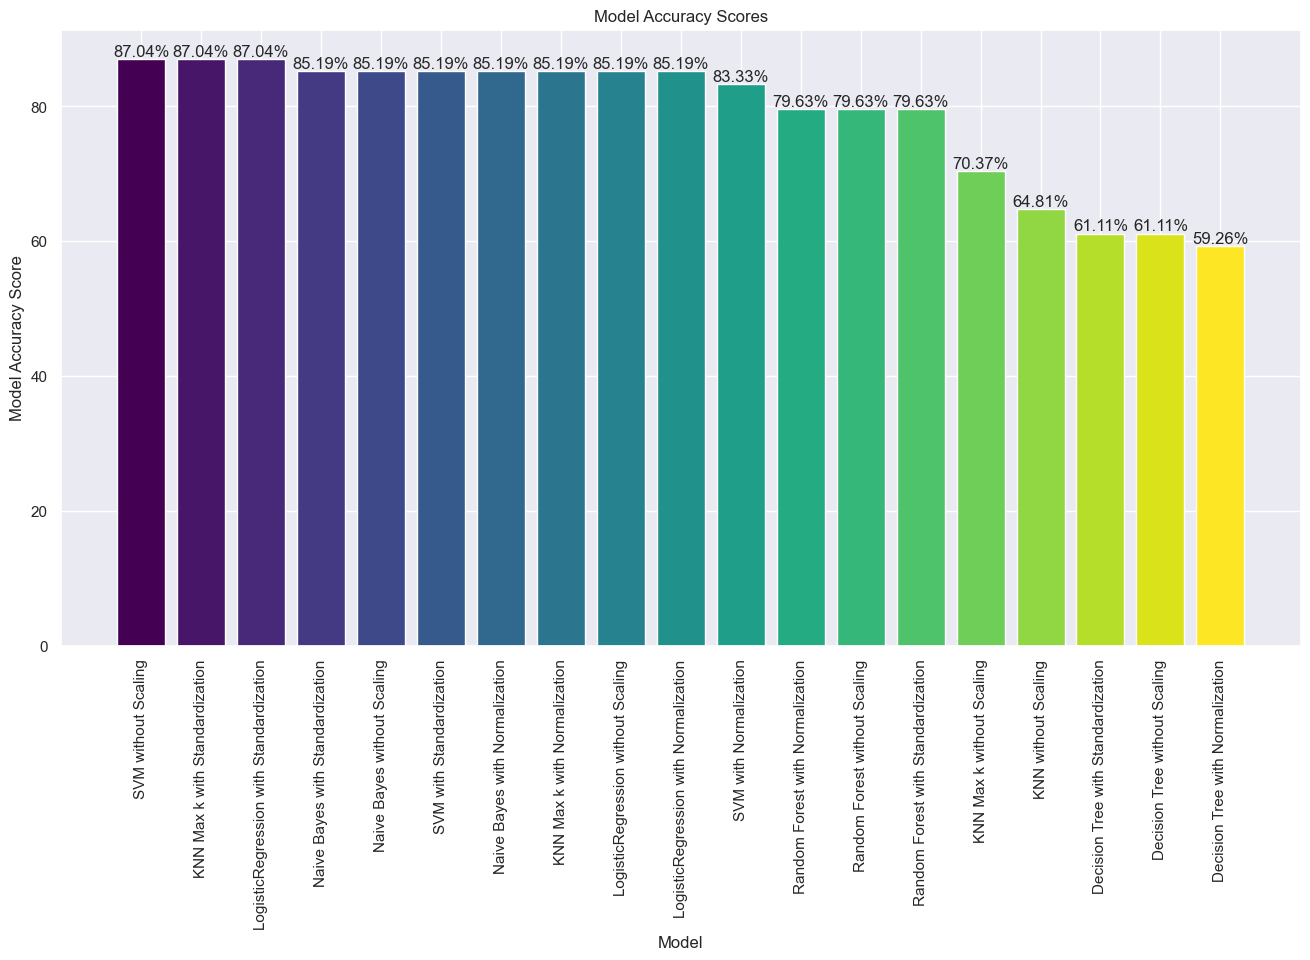

In [203]:
models_sorted = models.sort_values(by='Model Accuracy Score', ascending=False)
num_models = len(models_sorted)
colors = plt.cm.viridis(np.linspace(0, 1, num_models))
plt.figure(figsize=(16, 8))
bars = plt.bar(models_sorted['Model'], models_sorted['Model Accuracy Score'], color=colors)
plt.ylabel('Model Accuracy Score')
plt.xlabel('Model')
plt.title('Model Accuracy Scores')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', va='bottom', ha='center')


plt.xticks(rotation=90)

plt.show()
